In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/champagne-data/champagne.csv


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data=pd.read_csv('/kaggle/input/champagne-data/champagne.csv')

In [5]:
data.head()

,Month,Sales
0,1964-01,2815
1,1964-02,2672
2,1964-03,2755
3,1964-04,2721
4,1964-05,2946


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Month   105 non-null    object
 1   Sales   105 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 1.8+ KB


In [7]:
data.shape

(105, 2)

In [8]:
data['Month']=pd.to_datetime(data['Month'])

In [9]:
data.head()

,Month,Sales
0,1964-01-01,2815
1,1964-02-01,2672
2,1964-03-01,2755
3,1964-04-01,2721
4,1964-05-01,2946


In [10]:
data.set_index('Month',inplace=True)

<Axes: xlabel='Month'>

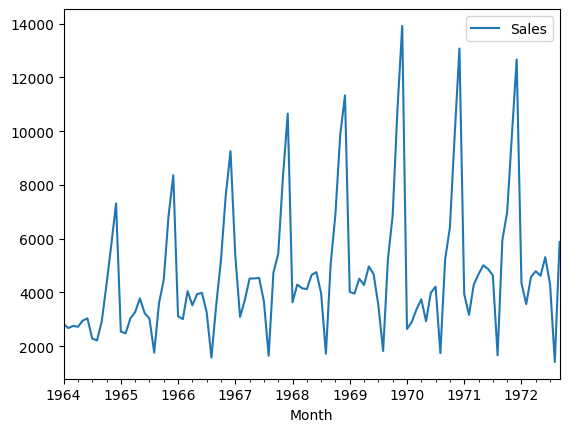

In [11]:
data.plot()

In [12]:
#Check for stationarity using Ad Fuller test
from statsmodels.tsa.stattools import adfuller
def check_stationarity(data):
    adf=adfuller(data)
    print(f'Test Statistic : {adf[0]}')
    print(f'P value : {adf[1]}')
    print(f'Lags used : {adf[2]}')
    print(f'Number of observations : {adf[3]}')
    for key in adf[4].keys():
        print(key,adf[4][key])
    print('*********************************\n')
    if(adf[1]<=0.05):
        print('Strong evidence against null hypotheisis data is stationary')
    else:
        print('Weak evidence against null hypothesis data is not stationary')
    

In [13]:
check_stationarity(data)

Test Statistic : -1.8335930563276224
P value : 0.36391577166024536
Lags used : 11
Number of observations : 93
1% -3.502704609582561
5% -2.8931578098779522
10% -2.583636712914788
*********************************

Weak evidence against null hypothesis data is not stationary


In [14]:
data['first diff']=data['Sales'].diff(1)

In [15]:
check_stationarity(data['first diff'].dropna())

Test Statistic : -7.189896448051001
P value : 2.519620447387081e-10
Lags used : 11
Number of observations : 92
1% -3.503514579651927
5% -2.893507960466837
10% -2.583823615311909
*********************************

Strong evidence against null hypotheisis data is stationary


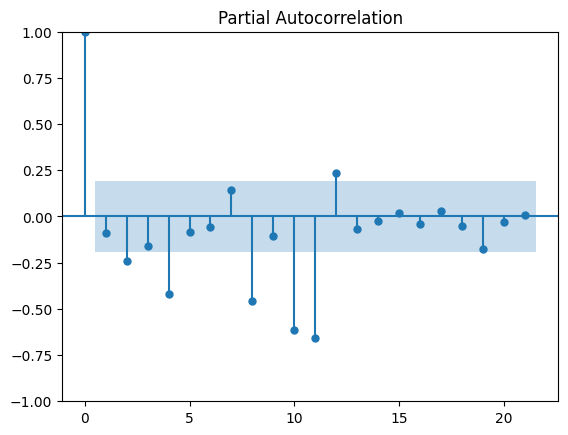

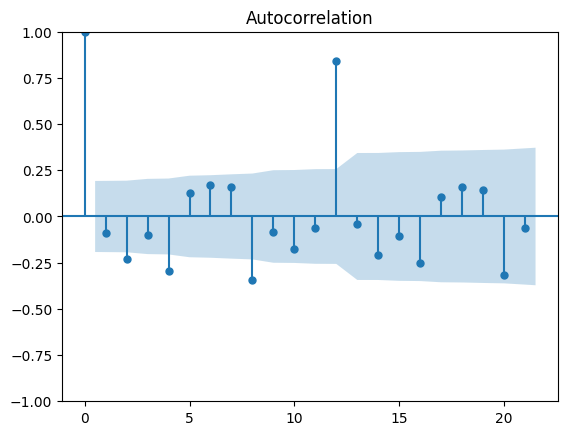

In [16]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plot_pacf(data['first diff'].dropna());
plot_acf(data['first diff'].dropna());

In [17]:
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(data['first diff'].dropna(),order=(12,1,2))
model=model.fit()

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Us

In [18]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             first diff   No. Observations:                  104
Model:                ARIMA(12, 1, 2)   Log Likelihood                -849.207
Date:                Sat, 02 Dec 2023   AIC                           1728.414
Time:                        10:22:10   BIC                           1767.935
Sample:                    02-01-1964   HQIC                          1744.422
                         - 09-01-1972                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1499      0.802     -0.187      0.852      -1.721       1.421
ar.L2         -0.1828      0.760     -0.240      0.810      -1.673       1.308
ar.L3         -0.1561      0.763     -0.205      0.838      -1.651       1.339
ar.L4         -0.2208      0.749     -0.295      0.768      -1.689       1.247
ar.L5         -0.1675      0.771     -0.217      0.828      -1.679       1.344
ar.L6         -0.1764      0.779     -0.226      0.821      -1.704       1.351
ar.L7         -0.1380      0.777     -0.178      0.859      -1.661       1.385
ar.L8         -0.2291      0.747     -0.307      0.759      -1.692       1.234
ar.L9         -0.1486      0.792     -0.188      0.851      -1.701       1.404
ar.L10        -0.1656      0.763     -0.217      0.828      -1.660       1.329
ar.L11        -0.1561      0.752     -0.208      0.836      -1.631       1.318
ar.L12         0.7645      0.745      1.026      0.305      -0.696       2.225
ma.L1         -1.5638      0.853     -1.834      0.067      -3.235       0.108
ma.L2          0.5878      0.715      0.822      0.411      -0.813       1.989
sigma2       6.93e+05   1.03e+05      6.755      0.000    4.92e+05    8.94e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):                50.25
Prob(Q):                              0.80   Prob(JB):                         0.00
Heteroskedasticity (H):               1.93   Skew:                            -0.67
Prob(H) (two-sided):                  0.06   Kurtosis:                         6.15
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<Axes: xlabel='Month'>

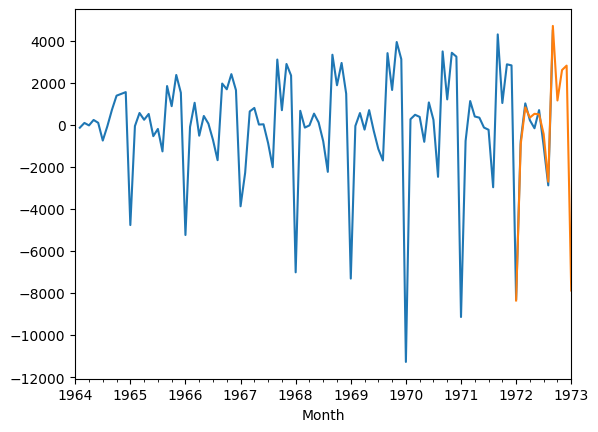

In [19]:
data['first diff'].plot()
model.predict(start='1972-01-01',end='1973-01-01').plot()

In [20]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [21]:
sar_model=SARIMAX(data['first diff'],order=(1,1,1),seasonal_order=(1,1,1,12))

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [22]:
sar_model=sar_model.fit()

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.30103D+00    |proj g|=  3.92963D-01

At iterate    5    f=  7.18855D+00    |proj g|=  1.49568D-03

At iterate   10    f=  7.18813D+00    |proj g|=  9.62005D-03

At iterate   15    f=  7.18764D+00    |proj g|=  1.27714D-03

At iterate   20    f=  7.18735D+00    |proj g|=  3.07632D-03

At iterate   25    f=  7.18730D+00    |proj g|=  5.42905D-04

At iterate   30    f=  7.16870D+00    |proj g|=  7.84267D-02

At iterate   35    f=  7.15241D+00    |proj g|=  9.38124D-03

At iterate   40    f=  7.15072D+00    |proj g|=  8.87134D-03

At iterate   45    f=  7.14977D+00    |proj g|=  3.04122D-03

At iterate   50    f=  7.14943D+00    |proj g|=  9.53795D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/opt/conda/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<Axes: xlabel='Month'>

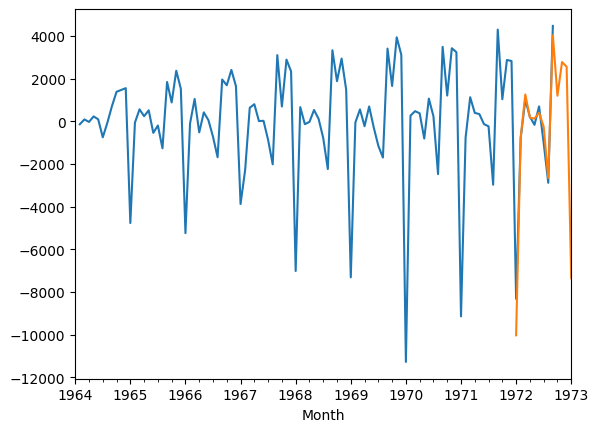

In [23]:
data['first diff'].plot()
sar_model.predict(start='1972-01-01',end='1973-01-01').plot()

In [31]:
# Future Predictions
future_dates=pd.DataFrame({'Future Dates':pd.date_range(start='1972-09-01',end='1974-09-01',freq='MS')})
future_dates['Future Dates'] = pd.to_datetime(future_dates['Future Dates'])

In [35]:
predicted_val=sar_model.predict(start='1972-09-01',end='1974-09-01')

<Axes: xlabel='Month'>

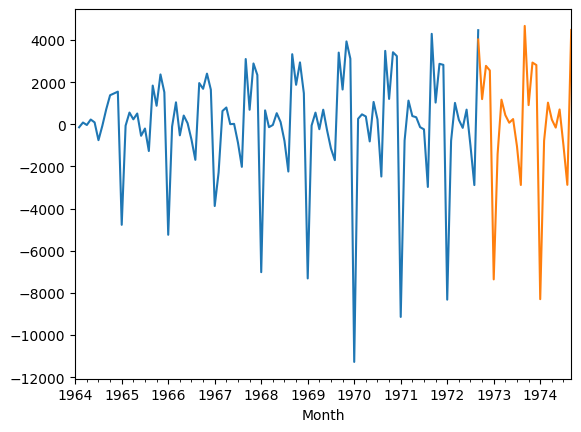

In [37]:
data['first diff'].plot()
predicted_val.plot()